In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
churn_clean_data = pd.read_csv ('/Users/jasminemoniquecooper/Downloads/new_cleaned_data_two.csv')
pd.set_option('display.max_columns', None)
churn_clean_data.head(10)

,Unnamed: 0.1,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,Urban,America/Sitka,Environmental health practitioner,0.005273,68.000000,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,Urban,America/Detroit,"Programmer, multimedia",1.000000,27.000000,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,Urban,America/Los_Angeles,Chief Financial Officer,4.000000,50.000000,Regular High School Diploma,Student,21157.834718,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,Suburban,America/Los_Angeles,Solicitor,1.000000,48.000000,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,Suburban,America/Chicago,Medical illustrator,0.000000,83.000000,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
5,5,6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701.0,Urban,America/New_York,Chief Technology Officer,3.000000,83.000000,No Schooling Completed,Full Time,34632.250245,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,None,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
6,6,7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535.0,Suburban,America/New_York,"Surveyor, hydrographic",0.000000,63.313012,Associate's Degree,Full Time,11467.500000,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
7,7,8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144.0,Suburban,America/Chicago,Sales promotion account executive,2.000000,63.664165,Bachelor's Degree,Full Time,26759.640000,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,54.818248,114.754111,979.612708,2,2,2,5,2,3,4,5
8,8,9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351.0,Suburban,America/New_York,Teaching laboratory technician,2.000000,49.000000,"Some College, Less than 1 Year",Full Time,58634.510000,Separated,Prefer not to answer,No,6.637259,20,2,3,No,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4
9,9,10,10,I676080,86f1

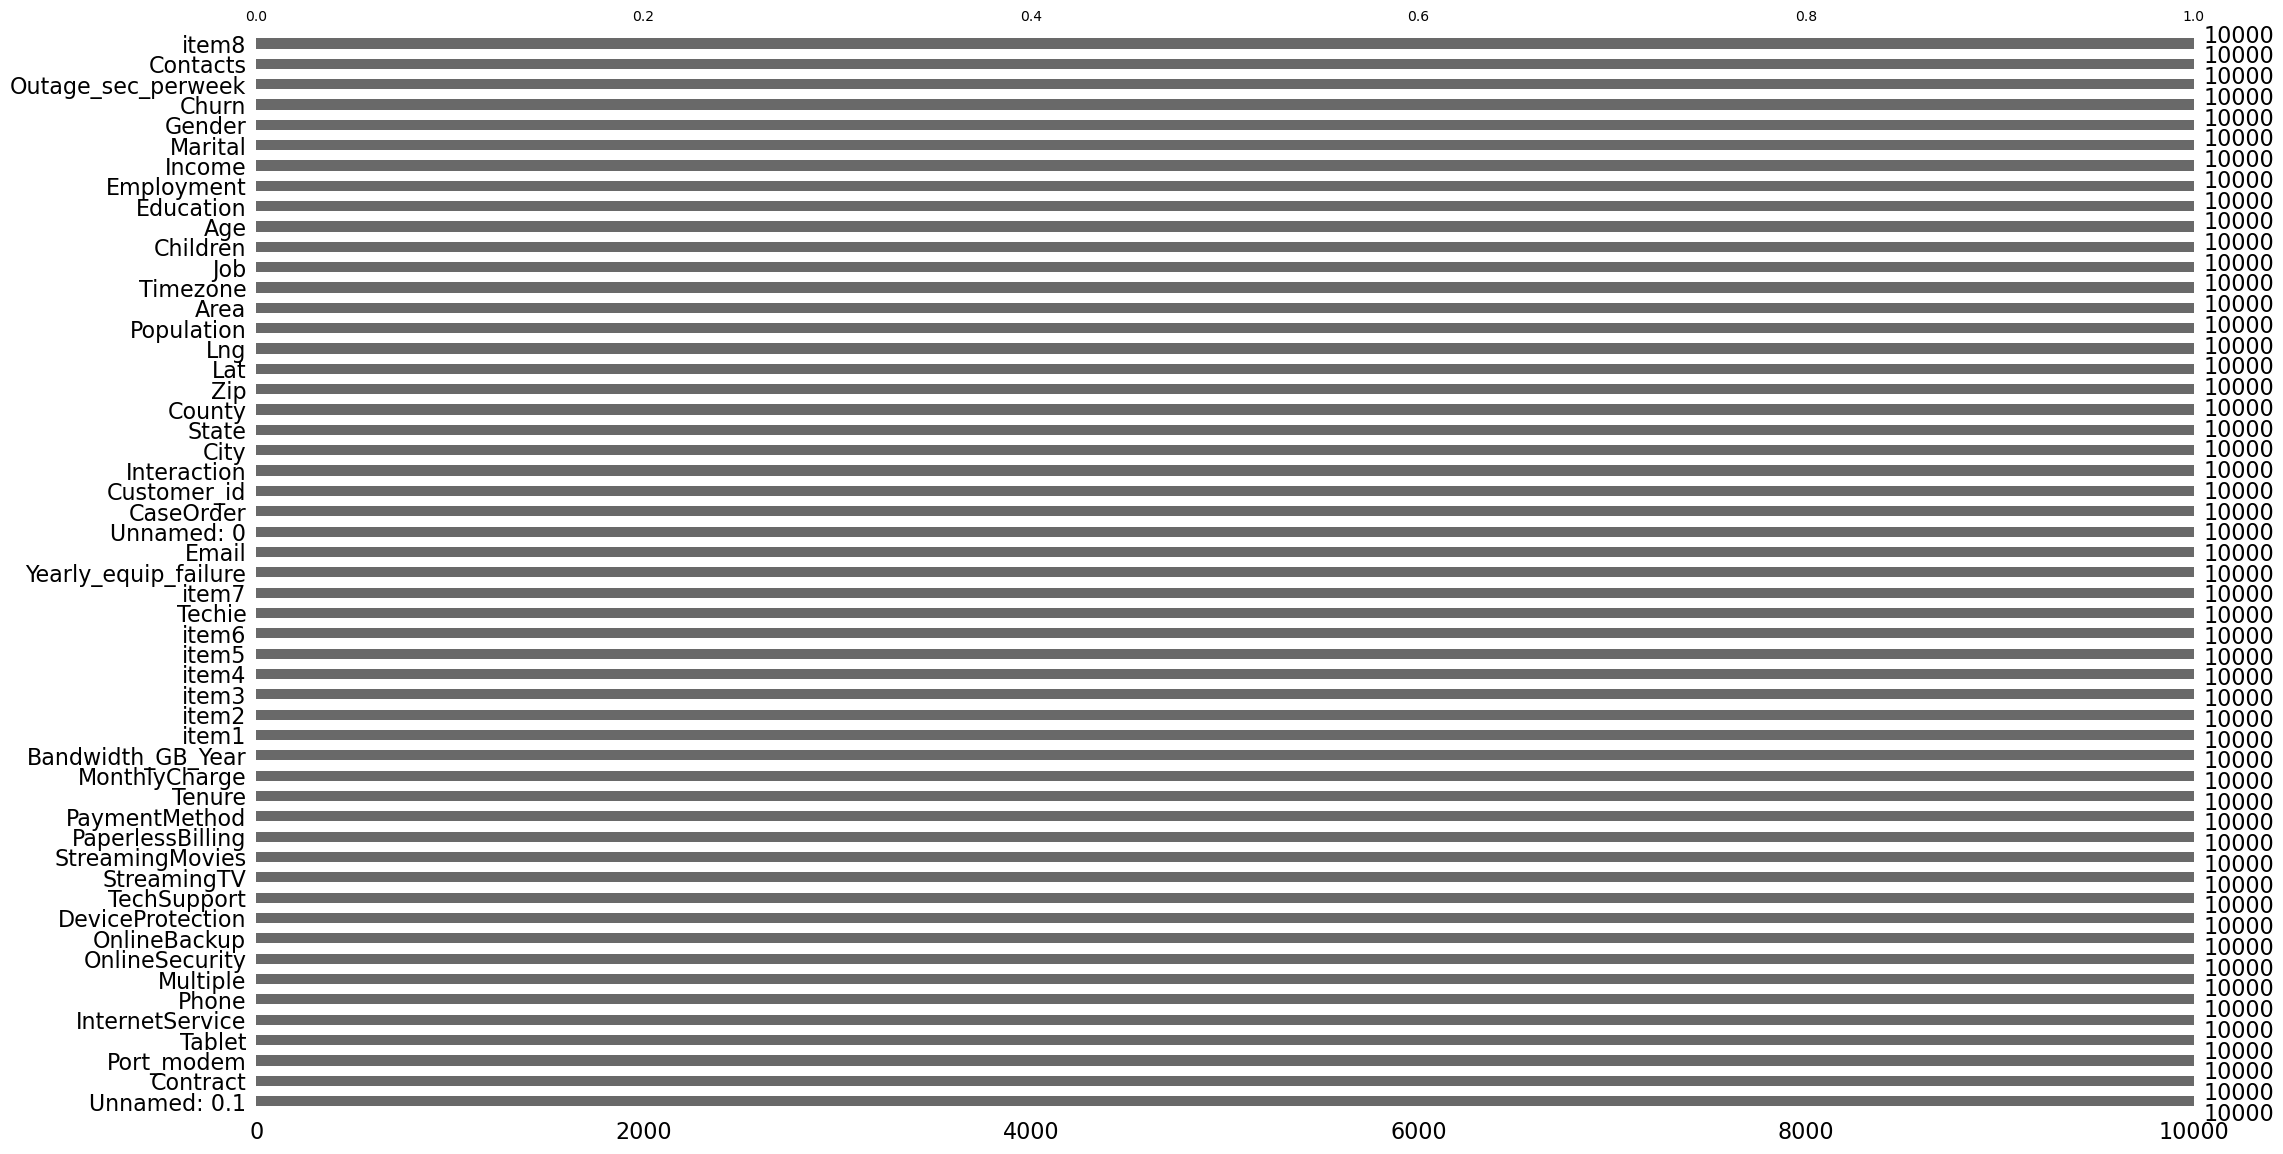

In [2]:
#ensure I pulled correct data 
import missingno as msno
column_order = churn_clean_data.isnull().sum().sort_values().index
msno.bar(churn_clean_data[column_order])
plt.show()

In [3]:
churn_clean_data.describe()

,Unnamed: 0.1,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9812.142828,1.887762,52.767278,39479.900705,11.452955,12.016000,0.994200,0.398000,34.624193,174.076305,3363.569891,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14419.539901,1.999908,19.150472,25724.591626,7.025921,3.025898,0.988466,0.635953,25.903916,43.335473,2153.675868,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.00000,1.00000,1.00000,601.000000,17.966120,-171.688150,2.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2499.75000,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,778.000000,0.148795,37.000000,22120.185000,8.054362,10.000000,0.000000,0.000000,8.197844,141.071078,1244.222704,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4999.50000,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2983.500000,1.000000,53.380744,33488.523060,10.202896,12.000000,1.000000,0.000000,36.852175,169.915400,3046.038041,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7499.25000,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13221.250000,3.000000,68.000000,50601.906916,12.487644,14.000000,2.000000,1.000000,60.457955,203.777441,5508.571250,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9999.00000,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
churn_clean_data["Churn"] = churn_clean_data["Churn"].astype('category')
churn_clean_data["Churn"].dtypes

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [5]:
#churn variable is whether the customer discontinued service within the last
#month - yes or no 

# Calculate the mode (most frequent category)
churn_mode = churn_clean_data['Churn'].mode().iloc[0]

# Calculate frequency counts
churn_frequencies = churn_clean_data['Churn'].value_counts()

# Calculate percentage distribution
churn_percentages = churn_clean_data['Churn'].value_counts(normalize=True) * 100

# Display the results
print("Mode (most frequent 'Churn'): ", churn_mode)
print("\nFrequency counts of 'Churn':")
print(churn_frequencies)
print("\nPercentage distribution of 'Churn':")
print(churn_percentages)

Mode (most frequent 'Churn'):  No

Frequency counts of 'Churn':
No     7350
Yes    2650
Name: Churn, dtype: int64

Percentage distribution of 'Churn':
No     73.5
Yes    26.5
Name: Churn, dtype: float64


In [6]:
churn_clean_data["PaymentMethod"] = churn_clean_data["PaymentMethod"].astype('category')
churn_clean_data["PaymentMethod"].dtypes

CategoricalDtype(categories=['Bank Transfer(automatic)', 'Credit Card (automatic)',
                  'Electronic Check', 'Mailed Check'],
, ordered=False)

In [7]:
# Calculate the mode (most frequent category)
pay_mode = churn_clean_data['PaymentMethod'].mode().iloc[0]

# Calculate frequency counts
pay_frequencies = churn_clean_data['PaymentMethod'].value_counts()

# Calculate percentage distribution
pay_percentages = churn_clean_data['PaymentMethod'].value_counts(normalize=True) * 100

# Display the results
print("Mode (most frequent 'Payment Method'): ", pay_mode)
print("\nFrequency counts of 'Payment Method':")
print(pay_frequencies)
print("\nPercentage distribution of 'Payment Method':")
print(pay_percentages)

Mode (most frequent 'Payment Method'):  Electronic Check

Frequency counts of 'Payment Method':
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

Percentage distribution of 'Payment Method':
Electronic Check            33.98
Mailed Check                22.90
Bank Transfer(automatic)    22.29
Credit Card (automatic)     20.83
Name: PaymentMethod, dtype: float64


In [8]:
churn_clean_data["Area"] = churn_clean_data["Area"].astype('category')
churn_clean_data["Area"].dtypes

CategoricalDtype(categories=['Rural', 'Suburban', 'Urban'], ordered=False)

In [9]:
# Calculate the mode (most frequent category)
area_mode = churn_clean_data['Area'].mode().iloc[0]

# Calculate frequency counts
area_frequencies = churn_clean_data['Area'].value_counts()

# Calculate percentage distribution
area_percentages = churn_clean_data['Area'].value_counts(normalize=True) * 100

# Display the results
print("Mode (most frequent 'Area'): ", area_mode)
print("\nFrequency counts of 'Area':")
print(area_frequencies)
print("\nPercentage distribution of 'Area':")
print(area_percentages)


Mode (most frequent 'Area'):  Suburban

Frequency counts of 'Area':
Suburban    3346
Rural       3327
Urban       3327
Name: Area, dtype: int64

Percentage distribution of 'Area':
Suburban    33.46
Rural       33.27
Urban       33.27
Name: Area, dtype: float64


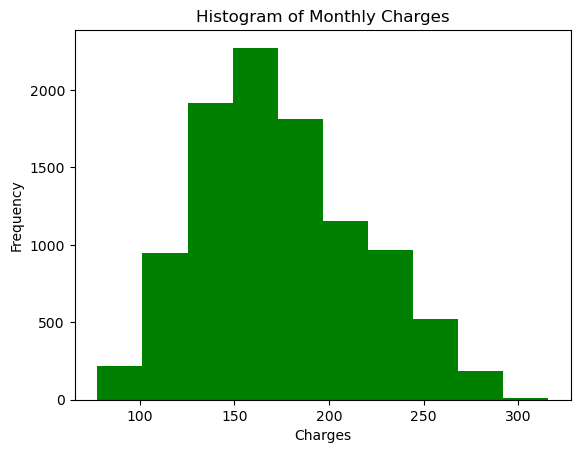

In [10]:
data = churn_clean_data['MonthlyCharge']


plt.hist(data, bins=10, color='green')  
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')
plt.grid(False)

# Show the histogram
plt.show()


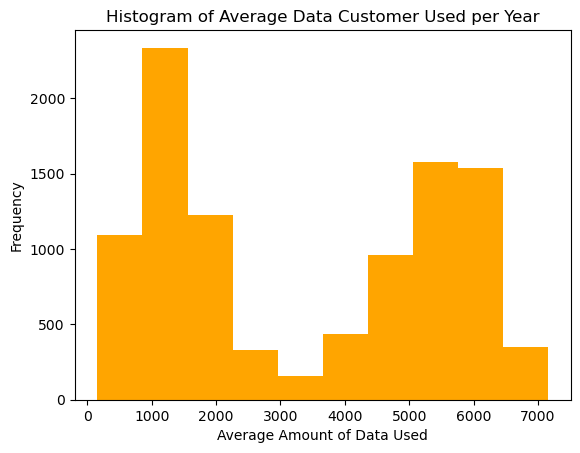

In [11]:
data = churn_clean_data['Bandwidth_GB_Year']


plt.hist(data, bins=10, color='orange')  
plt.xlabel('Average Amount of Data Used')
plt.ylabel('Frequency')
plt.title('Histogram of Average Data Customer Used per Year')
plt.grid(False)

# Show the histogram
plt.show()

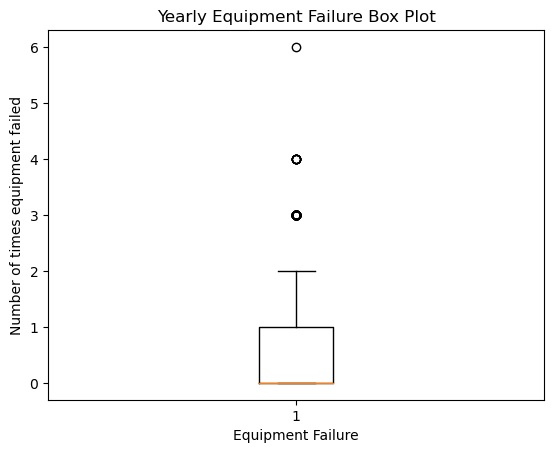

In [12]:
data = churn_clean_data['Yearly_equip_failure']


plt.boxplot(data)  
plt.xlabel('Equipment Failure')
plt.ylabel('Number of times equipment failed')
plt.title('Yearly Equipment Failure Box Plot')
plt.grid(False)

# Show the histogram
plt.show()

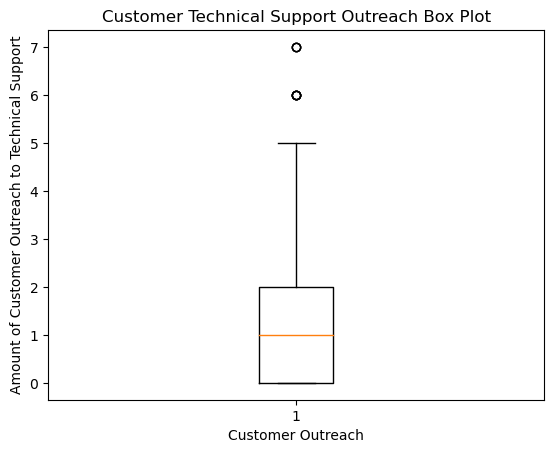

In [13]:
data = churn_clean_data['Contacts']


plt.boxplot(data)
plt.xlabel('Customer Outreach')
plt.ylabel('Amount of Customer Outreach to Technical Support')
plt.title('Customer Technical Support Outreach Box Plot')
plt.grid(False)

plt.show()

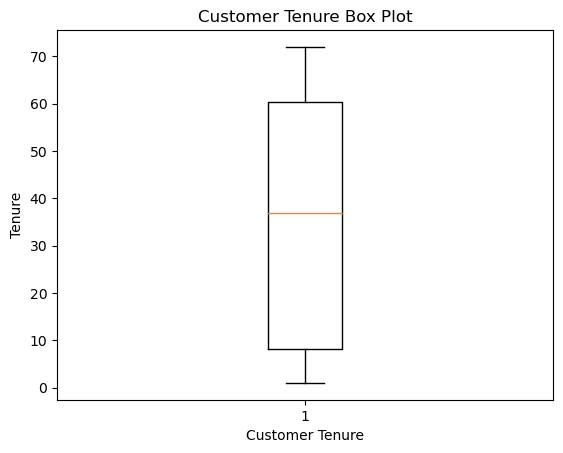

In [14]:
data = churn_clean_data['Tenure']


plt.boxplot(data)
plt.xlabel('Customer Tenure')
plt.ylabel('Tenure')
plt.title('Customer Tenure Box Plot')
plt.grid(False)

plt.show()


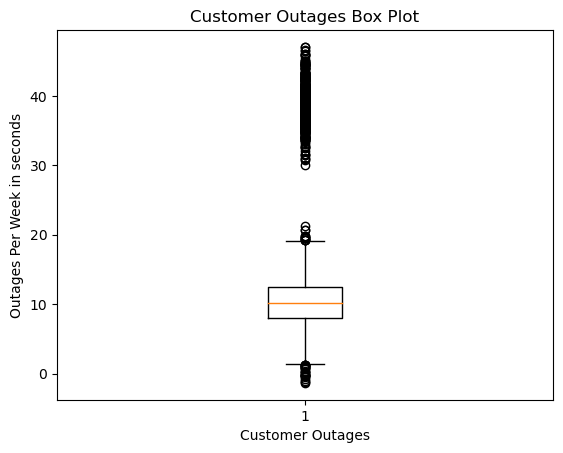

In [15]:
data = churn_clean_data['Outage_sec_perweek']


plt.boxplot(data)
plt.xlabel('Customer Outages')
plt.ylabel('Outages Per Week in seconds')
plt.title('Customer Outages Box Plot')
plt.grid(False)

plt.show()

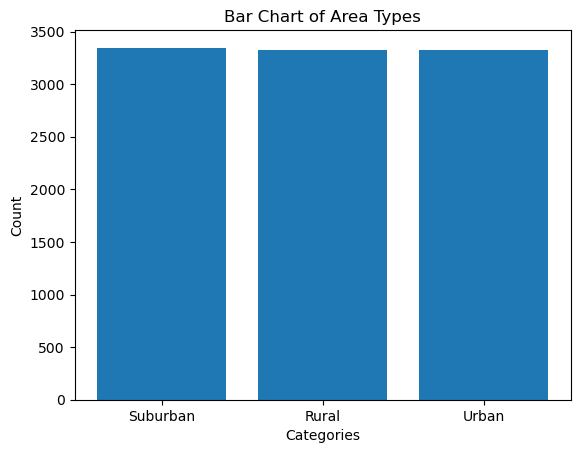

In [16]:
data = {'Area': churn_clean_data['Area']}
df = pd.DataFrame(data)

category_counts = df['Area'].value_counts()

plt.bar(category_counts.index, category_counts)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart of Area Types')

plt.show()

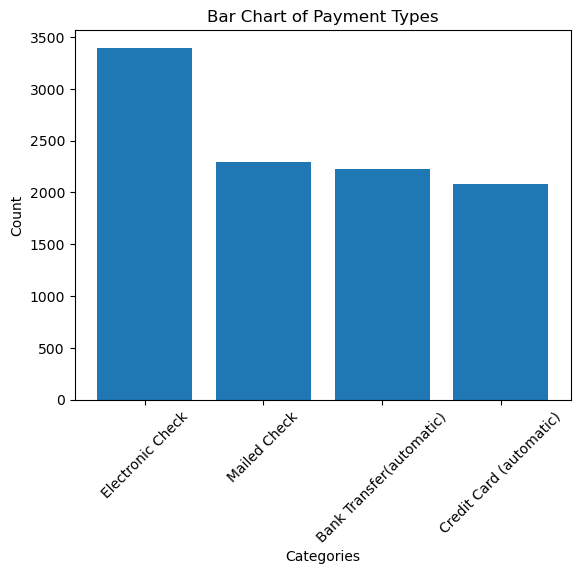

In [17]:
data = {'PaymentMethod': churn_clean_data['PaymentMethod']}
df = pd.DataFrame(data)

category_counts = df['PaymentMethod'].value_counts()

plt.bar(category_counts.index, category_counts)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart of Payment Types')
plt.xticks(rotation=45)

plt.show()

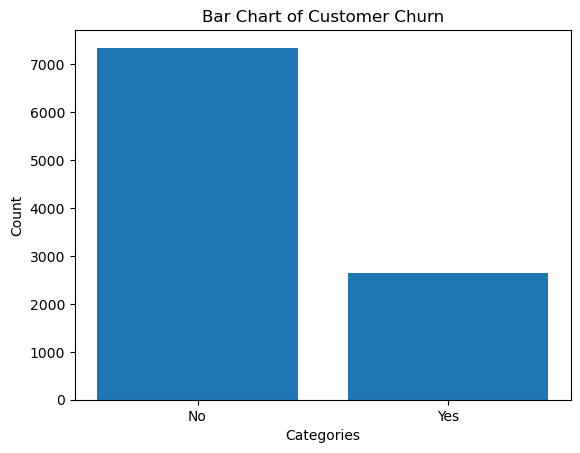

In [18]:
data = {'Churn': churn_clean_data['Churn']}
df = pd.DataFrame(data)

category_counts = df['Churn'].value_counts()

plt.bar(category_counts.index, category_counts)

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart of Customer Churn')

plt.show()

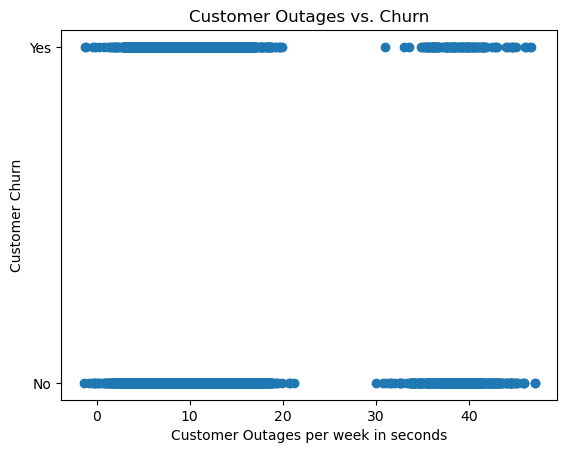

In [19]:

x_values = churn_clean_data['Outage_sec_perweek']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Outages per week in seconds')
plt.ylabel('Customer Churn')
plt.title('Customer Outages vs. Churn')

plt.show()


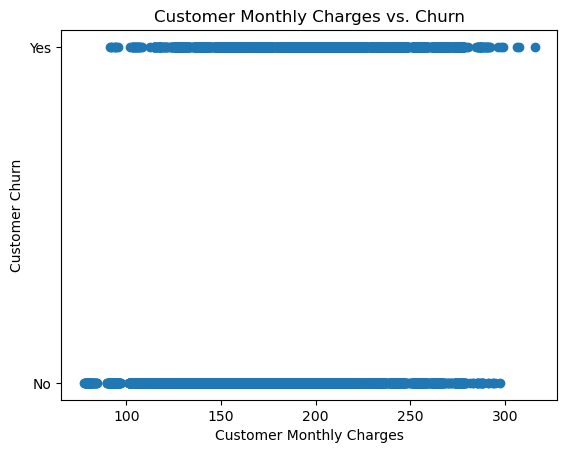

In [20]:

x_values = churn_clean_data['MonthlyCharge']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Monthly Charges')
plt.ylabel('Customer Churn')
plt.title('Customer Monthly Charges vs. Churn')

plt.show()

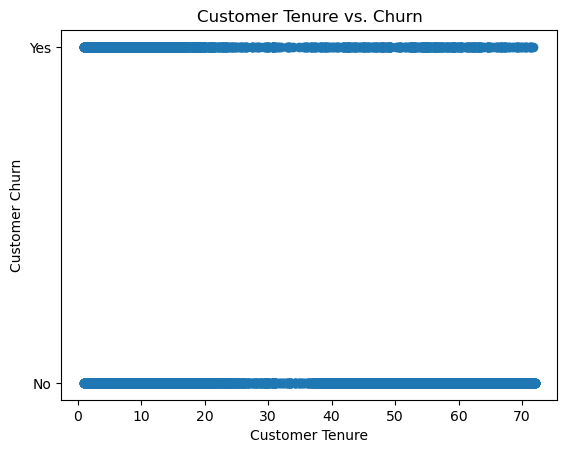

In [21]:
x_values = churn_clean_data['Tenure']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Tenure')
plt.ylabel('Customer Churn')
plt.title('Customer Tenure vs. Churn')

plt.show()

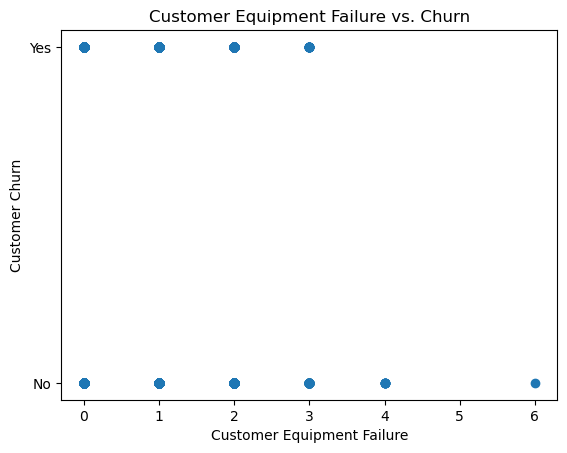

In [22]:
x_values = churn_clean_data['Yearly_equip_failure']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Equipment Failure')
plt.ylabel('Customer Churn')
plt.title('Customer Equipment Failure vs. Churn')

plt.show()

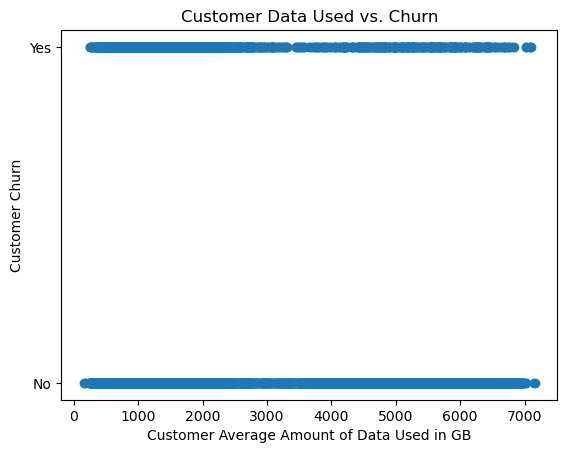

In [23]:
x_values = churn_clean_data['Bandwidth_GB_Year']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Average Amount of Data Used in GB')
plt.ylabel('Customer Churn')
plt.title('Customer Data Used vs. Churn')

plt.show()

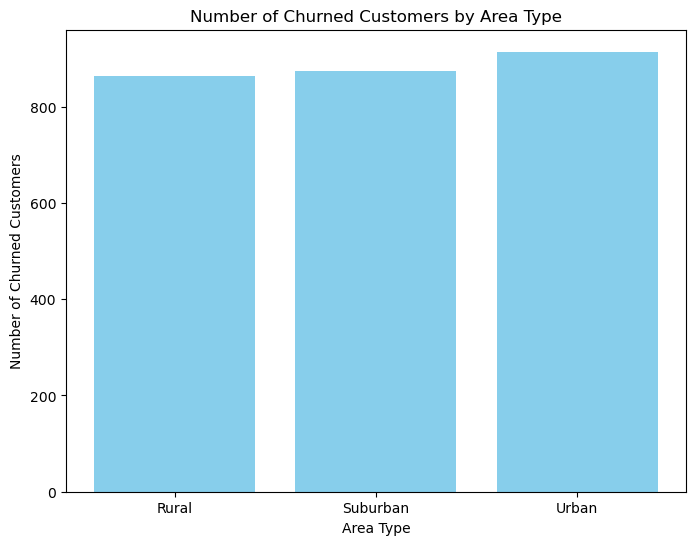

In [24]:
data = {
    'Area_Type': churn_clean_data['Area'],
    'Churn': churn_clean_data['Churn']
}

# Create a DataFrame
df = pd.DataFrame(data)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# Group the data by 'Area_Type' and count the number of churned customers in each group
churn_count = df.groupby('Area_Type')['Churn'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(churn_count['Area_Type'], churn_count['Churn'], color='skyblue')
plt.xlabel('Area Type')
plt.ylabel('Number of Churned Customers')
plt.title('Number of Churned Customers by Area Type')
plt.show()


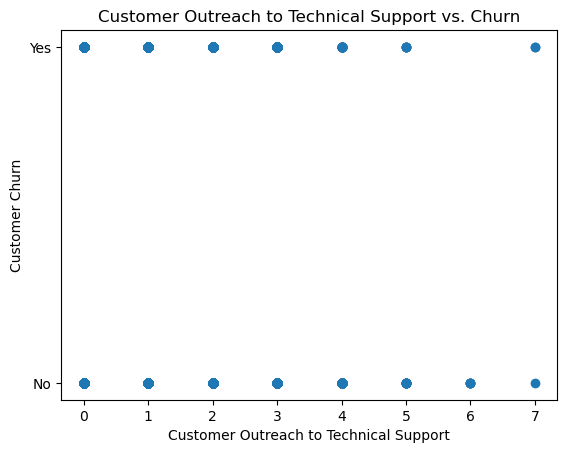

In [25]:
x_values = churn_clean_data['Contacts']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Outreach to Technical Support')
plt.ylabel('Customer Churn')
plt.title('Customer Outreach to Technical Support vs. Churn')

plt.show()

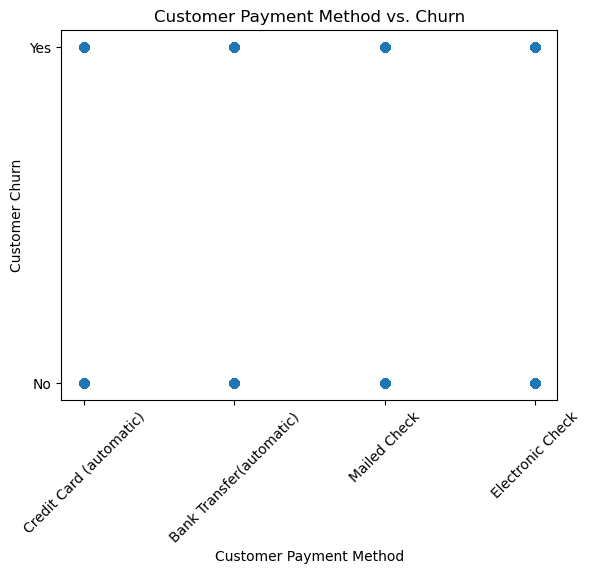

In [26]:
x_values = churn_clean_data['PaymentMethod']
y_values = churn_clean_data['Churn']

plt.scatter(x_values, y_values)

plt.xlabel('Customer Payment Method')
plt.ylabel('Customer Churn')
plt.title('Customer Payment Method vs. Churn')
plt.xticks(rotation = 45)

plt.show()

In [27]:
churn_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0.1          10000 non-null  int64   
 1   Unnamed: 0            10000 non-null  int64   
 2   CaseOrder             10000 non-null  int64   
 3   Customer_id           10000 non-null  object  
 4   Interaction           10000 non-null  object  
 5   City                  10000 non-null  object  
 6   State                 10000 non-null  object  
 7   County                10000 non-null  object  
 8   Zip                   10000 non-null  int64   
 9   Lat                   10000 non-null  float64 
 10  Lng                   10000 non-null  float64 
 11  Population            10000 non-null  float64 
 12  Area                  10000 non-null  category
 13  Timezone              10000 non-null  object  
 14  Job                   10000 non-null  object  
 15  Chi

In [28]:
from statsmodels.formula.api import logit

# One-hot encoding
df_encoded = pd.get_dummies(churn_clean_data, columns=['Area', 'PaymentMethod'])

# Map the "Churn" variable to numeric values
df_encoded["Churn"] = (df_encoded["Churn"] == 'Yes').astype(int)

# Rename columns for proper Python syntax
column_name_mapping = {
    "PaymentMethod_Bank Transfer(automatic)": "Bank_Transfer",
    "PaymentMethod_Credit Card (automatic)": "Credit_Card", 
    "PaymentMethod_Electronic Check": "Electronic_Check", 
    "PaymentMethod_Mailed Check": "Mailed_Check",
    "Area_Suburban": "Suburban",
    "Area_Urban": "Urban", 
    "Area_Rural": "Rural"
}

df_encoded.rename(columns=column_name_mapping, inplace=True)

# Fit the logistic regression model using one-hot encoded variables
formula = "Churn ~ Outage_sec_perweek + MonthlyCharge + Tenure + Yearly_equip_failure + Bandwidth_GB_Year + Contacts + Rural + Suburban + Urban + Bank_Transfer + Credit_Card + Electronic_Check + Mailed_Check"
mdl_initial = logit(formula, data=df_encoded).fit()
print(mdl_initial.params)
print(mdl_initial.summary())


Optimization terminated successfully.
         Current function value: 0.359144
         Iterations 14
Intercept              -2.914391
Outage_sec_perweek     -0.026269
MonthlyCharge           0.032553
Tenure                 -0.029948
Yearly_equip_failure   -0.047243
Bandwidth_GB_Year      -0.000475
Contacts                0.032380
Rural                  -0.974215
Suburban               -1.014395
Urban                  -0.925781
Bank_Transfer          -0.874362
Credit_Card            -0.782264
Electronic_Check       -0.507671
Mailed_Check           -0.750092
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sat, 07 Oct 2023   Pseudo R-squ.:                  0.3789
Time:                    

In [29]:
# Check if the entire DataFrame is numeric
is_numeric = df_encoded.select_dtypes(include=[np.number]).empty

if is_numeric:
    print("The entire DataFrame is numeric.")
else:
    print("The DataFrame contains non-numeric columns.")

# Identify and print numeric columns
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

if numeric_columns:
    print("Numeric columns:", numeric_columns)
else:
    print("No numeric columns found.")


The DataFrame contains non-numeric columns.
Numeric columns: ['Unnamed: 0.1', 'Unnamed: 0', 'CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'Rural', 'Suburban', 'Urban', 'Bank_Transfer', 'Credit_Card', 'Electronic_Check', 'Mailed_Check']


In [30]:
print(df_encoded["Bank_Transfer"])

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: Bank_Transfer, Length: 10000, dtype: uint8


In [31]:
from sklearn.metrics import roc_auc_score

# Get predicted class labels (0 or 1)
predicted_labels = mdl_initial.predict(df_encoded)

# Calculate ROC AUC score
roc_auc = roc_auc_score(df_encoded["Churn"], predicted_labels)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8878320112950842


In [32]:
mdl_initial.params

Intercept              -2.914391
Outage_sec_perweek     -0.026269
MonthlyCharge           0.032553
Tenure                 -0.029948
Yearly_equip_failure   -0.047243
Bandwidth_GB_Year      -0.000475
Contacts                0.032380
Rural                  -0.974215
Suburban               -1.014395
Urban                  -0.925781
Bank_Transfer          -0.874362
Credit_Card            -0.782264
Electronic_Check       -0.507671
Mailed_Check           -0.750092
dtype: float64

In [33]:
# Create a new DataFrame with only the numeric columns
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

df_numeric = df_encoded[numeric_columns]

#independent variables:
independent_vars = ["Churn", "Outage_sec_perweek", "MonthlyCharge", "Tenure", "Yearly_equip_failure", "Bandwidth_GB_Year", "Contacts", "Rural", "Suburban", "Urban", "Bank_Transfer", "Credit_Card", "Electronic_Check", "Mailed_Check"]

df_independent = df_numeric[independent_vars]
print(df_independent)

      Churn  Outage_sec_perweek  MonthlyCharge     Tenure  \
0         0            6.972566     171.449762   6.795513   
1         1           12.014541     242.948015   1.156681   
2         0           10.245616     159.440398  15.754144   
3         0           15.206193     120.249493  17.087227   
4         1            8.960316     150.761216   1.670972   
...     ...                 ...            ...        ...   
9995      0            9.265392     159.828800  68.197130   
9996      0            8.115849     208.856400  61.040370   
9997      0            4.837696     168.220900  13.446717   
9998      0           12.076460     252.628600  71.095600   
9999      0           12.641760     218.371000  63.350860   

      Yearly_equip_failure  Bandwidth_GB_Year  Contacts  Rural  Suburban  \
0                        1         904.536110         0      0         0   
1                        1         800.982766         0      0         0   
2                        1        2054.

In [34]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Extract your target variable (y) and feature matrix (X) from your data
X = df_independent.drop('Churn', axis=1)  # Assuming 'Churn' is the target variable
y = df_independent['Churn']  # Assuming 'Churn' is the target variable

# Create the logistic regression model as the estimator for RFE
estimator = LogisticRegression()

# Create the RFE object with the estimator and number of features to select
rfe = RFE(estimator)
rfe.fit(X, y)  # X is the feature matrix, y is the target variable

# Get the selected features; it returns a boolean mask to indicate which features are selected
selected_features = rfe.support_
print("Selected Features:", selected_features)

# Rank the selected features; lower rankings mean the features are more important
feature_ranking = rfe.ranking_
print("Feature Ranking:", feature_ranking)

# Use the selected features to create a reduced feature matrix
# Train your logistic regression model with only these features
X_reduced = X.loc[:, selected_features]
print("Reduced Feature Matrix (X_reduced):", X_reduced)


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Selected Features: [False False  True  True False False False False  True  True  True  True
 False]
Feature Ranking: [6 5 1 1 8 7 3 4 1 1 1 1 2]
Reduced Feature Matrix (X_reduced):          Tenure  Yearly_equip_failure  Urban  Bank_Transfer  Credit_Card  \
0      6.795513                     1      1              0            1   
1      1.156681                     1      1              1            0   
2     15.754144                     1      1              0            1   
3     17.087227                     0      0              0            0   
4      1.670972                     1      0              0            0   
...         ...                   ...    ...            ...          ...   
9995  68.197130                     0      0              0            0   
9996  61.040370                     0      0              0            0   
9997  13.446717                     0      0              1            0   
9998  71.095600                     0      1              0

In [ ]:
#selected variables from RFE to use for reduced model 
#"MonthlyCharge"
#"Tenure"
#"Suburban"
#"Urban"
#"Bank_Transfer"
#"Credit_Card"

In [35]:
formula = "Churn ~ MonthlyCharge + Tenure + Suburban + Urban + Bank_Transfer + Credit_Card"
mdl_reduced = logit(formula, data=df_encoded).fit()
print(mdl_reduced.params)
print(mdl_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.371702
         Iterations 7
Intercept       -4.598793
MonthlyCharge    0.029351
Tenure          -0.063369
Suburban        -0.041062
Urban            0.074082
Bank_Transfer   -0.256587
Credit_Card     -0.175275
dtype: float64
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sat, 07 Oct 2023   Pseudo R-squ.:                  0.3572
Time:                        13:18:32   Log-Likelihood:                -3717.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025

In [36]:
from sklearn.metrics import roc_auc_score

# Get predicted class labels (0 or 1)
predicted_labels_two = mdl_reduced.predict(df_encoded)

# Calculate ROC AUC score
roc_auc = roc_auc_score(df_encoded["Churn"], predicted_labels_two)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8793508920549351


In [37]:
def next_best(current_variables, candidate_variables, target, data):
    best_auc = -1 
    next_variable = None
    
    for candidate_var in candidate_variables:
        # Create a list of current variables plus the candidate variable
        variables_to_use = current_variables + [candidate_var]
        
        # Calculate AUC using logistic regression
        import statsmodels.api as sm
        X = data[variables_to_use]
        model = sm.Logit(target, X).fit()
        predicted_probabilities = model.predict(X)
        auc = roc_auc_score(target, predicted_probabilities)
        
        # Update the next variable if AUC is better
        if auc > best_auc:
            best_auc = auc
            next_variable = candidate_var
    
    return next_variable

# Find the candidate variables
candidate_variables = ["Outage_sec_perweek", "MonthlyCharge", "Tenure", "Yearly_equip_failure", "Bandwidth_GB_Year", "Contacts", "Rural", "Suburban", "Urban", "Bank_Transfer", "Credit_Card", "Electronic_Check", "Mailed_Check"]

# Initialize the current variables
current_variables = []
target = df_encoded["Churn"]

# The forward stepwise variable selection procedure
number_iterations = 13
for i in range(number_iterations):
    next_variable = next_best(current_variables, candidate_variables, target, df_encoded)
    current_variables.append(next_variable)
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i + 1) + " is " + next_variable + ".")
print("Selected variables:", current_variables)

Optimization terminated successfully.
         Current function value: 0.600321
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.619552
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.468003
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.656293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.483506
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635469
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.653282
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.658131
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664072
  

In [38]:
from sklearn.metrics import roc_auc_score
formula = "Churn ~ Tenure + MonthlyCharge + Outage_sec_perweek + Bandwidth_GB_Year + Bank_Transfer + Credit_Card"
mdl_reduced_final = logit(formula, data=df_encoded).fit()
predict_final = mdl_reduced_final.predict(df_encoded)
roc_auc = roc_auc_score(df_encoded["Churn"], predict_final)
print("ROC AUC Score:", roc_auc)

Optimization terminated successfully.
         Current function value: 0.359799
         Iterations 7
ROC AUC Score: 0.8874038249261968


In [39]:
print(mdl_reduced_final.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sat, 07 Oct 2023   Pseudo R-squ.:                  0.3777
Time:                        13:21:50   Log-Likelihood:                -3598.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.4600      0.146    -30.446      0.000      -4.747      -4.173
Tenure                -0.0300      0.003    -10.860      0.000      -0.035      -0.025
MonthlyCharge       

In [40]:
conf_matrix = mdl_initial.pred_table()

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

print("Confusion Matrix:")
print(conf_matrix)
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


Confusion Matrix:
[[6727.  623.]
 [1096. 1554.]]
True Positives (TP): 1554.0
True Negatives (TN): 6727.0
False Positives (FP): 623.0
False Negatives (FN): 1096.0


In [41]:
#accuracy calculation
#(TN + TP)/(TN + FN + FP + TP)

accuracy = (TN + TP)/(TN + FN + FP + TP)
print(accuracy)

0.8281


In [42]:
print(mdl_reduced_final.params)

Intercept            -4.459998
Tenure               -0.029982
MonthlyCharge         0.032455
Outage_sec_perweek   -0.026452
Bandwidth_GB_Year    -0.000473
Bank_Transfer        -0.264642
Credit_Card          -0.176680
dtype: float64
